Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
airbnb<-read.csv('./data/airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
#nos quedamos con las columnas que queremos en un nuevo data set
column_select <- c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')
airbnb_select <- airbnb[column_select]

In [3]:
head(airbnb_select)
dim(airbnb_select)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,London,Entire home/apt,,1,1.0,1,1,50,NA,1,20,90,51.49247,-0.1886284
2,London,Entire home/apt,LB of Richmond upon Thames,8,2.5,5,5,175,NA,6,25,87,51.48200,-0.2392775
3,London,Entire home/apt,,2,1.0,1,1,155,NA,1,0,NA,51.51579,-0.1363321
4,Madrid,Private room,Palacio,2,1.0,1,1,36,NA,1,0,98,40.41011,-3.7147540
5,Madrid,Entire home/apt,Palacio,2,1.0,1,1,85,NA,1,0,95,40.41697,-3.7094389
6,Madrid,Private room,La Latina,2,1.0,1,1,20,861,1,10,91,40.40971,-3.7135612


[1] 14780    14

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [6]:
#si lo hicieramos con R Base seria así
# airbnb_select[airbnb_select$City == 'Madrid',]

#Pero vamos a utilizar la librería dplyr
#install.packages("dplyr")
library(dplyr)
df_madrid <- airbnb_select %>% filter(City == 'Madrid' & Room.Type == 'Entire home/apt' & Neighbourhood != '')

In [7]:
#eliminamos las columnas city porque siempre será madrid y Room.Type porque siempre sera casa o apartamento completo
df_madrid$City <- NULL
df_madrid$Room.Type <- NULL

head(df_madrid)
dim(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
2,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249
3,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843
4,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691
5,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322
6,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099


[1] 5601   12

Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [8]:
#generamos la nueva columna de metros cuadrados a partir de la de pies cuadados
df_madrid <- df_madrid %>% mutate(Square.Meters=.$Square.Feet*0.092903, .after=Square.Feet)
head(df_madrid)
dim(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Square.Meters,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,Palacio,2,1,1,1,85,NA,NA,1,0,95,40.41697,-3.709439
2,Malasaña,4,1,1,2,112,NA,NA,2,5,99,40.42319,-3.711249
3,Palacio,8,3,3,4,190,NA,NA,6,40,96,40.41651,-3.717843
4,La Latina,2,1,1,1,71,NA,NA,1,0,90,40.41200,-3.706691
5,Embajadores,2,NA,1,NA,34,NA,NA,1,6,88,40.40809,-3.700322
6,Embajadores,3,1,0,2,60,NA,NA,1,0,100,40.41085,-3.701099


[1] 5601   13

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [9]:
#total de registros
total_apt <- nrow(df_madrid)
#total de filas con NA en el campo
apt_na <- nrow(df_madrid %>% filter(is.na(Square.Meters)))

print(paste('El porcentaje de apartamentos con valor NA es:', round((apt_na*100)/total_apt) ,'%'))

[1] "El porcentaje de apartamentos con valor NA es: 94 %"


De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [10]:
#total registros diferentes NA
df_madrid_not_na <- df_madrid %>% filter(!is.na(Square.Meters))
apt_not_na <- nrow(df_madrid_not_na)
apt_0m <- nrow(df_madrid_not_na %>% filter(Square.Meters == 0))

print(paste('El porcentaje de apartamentos con valor 0 m^2 es:', round((apt_0m*100)/apt_not_na) ,'%'))

[1] "El porcentaje de apartamentos con valor 0 m^2 es: 37 %"


Reemplazar todos los 0m^2 por NA 

In [11]:
df_madrid <- mutate(df_madrid, Square.Meters = ifelse(Square.Meters == 0, NA, Square.Meters))

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”


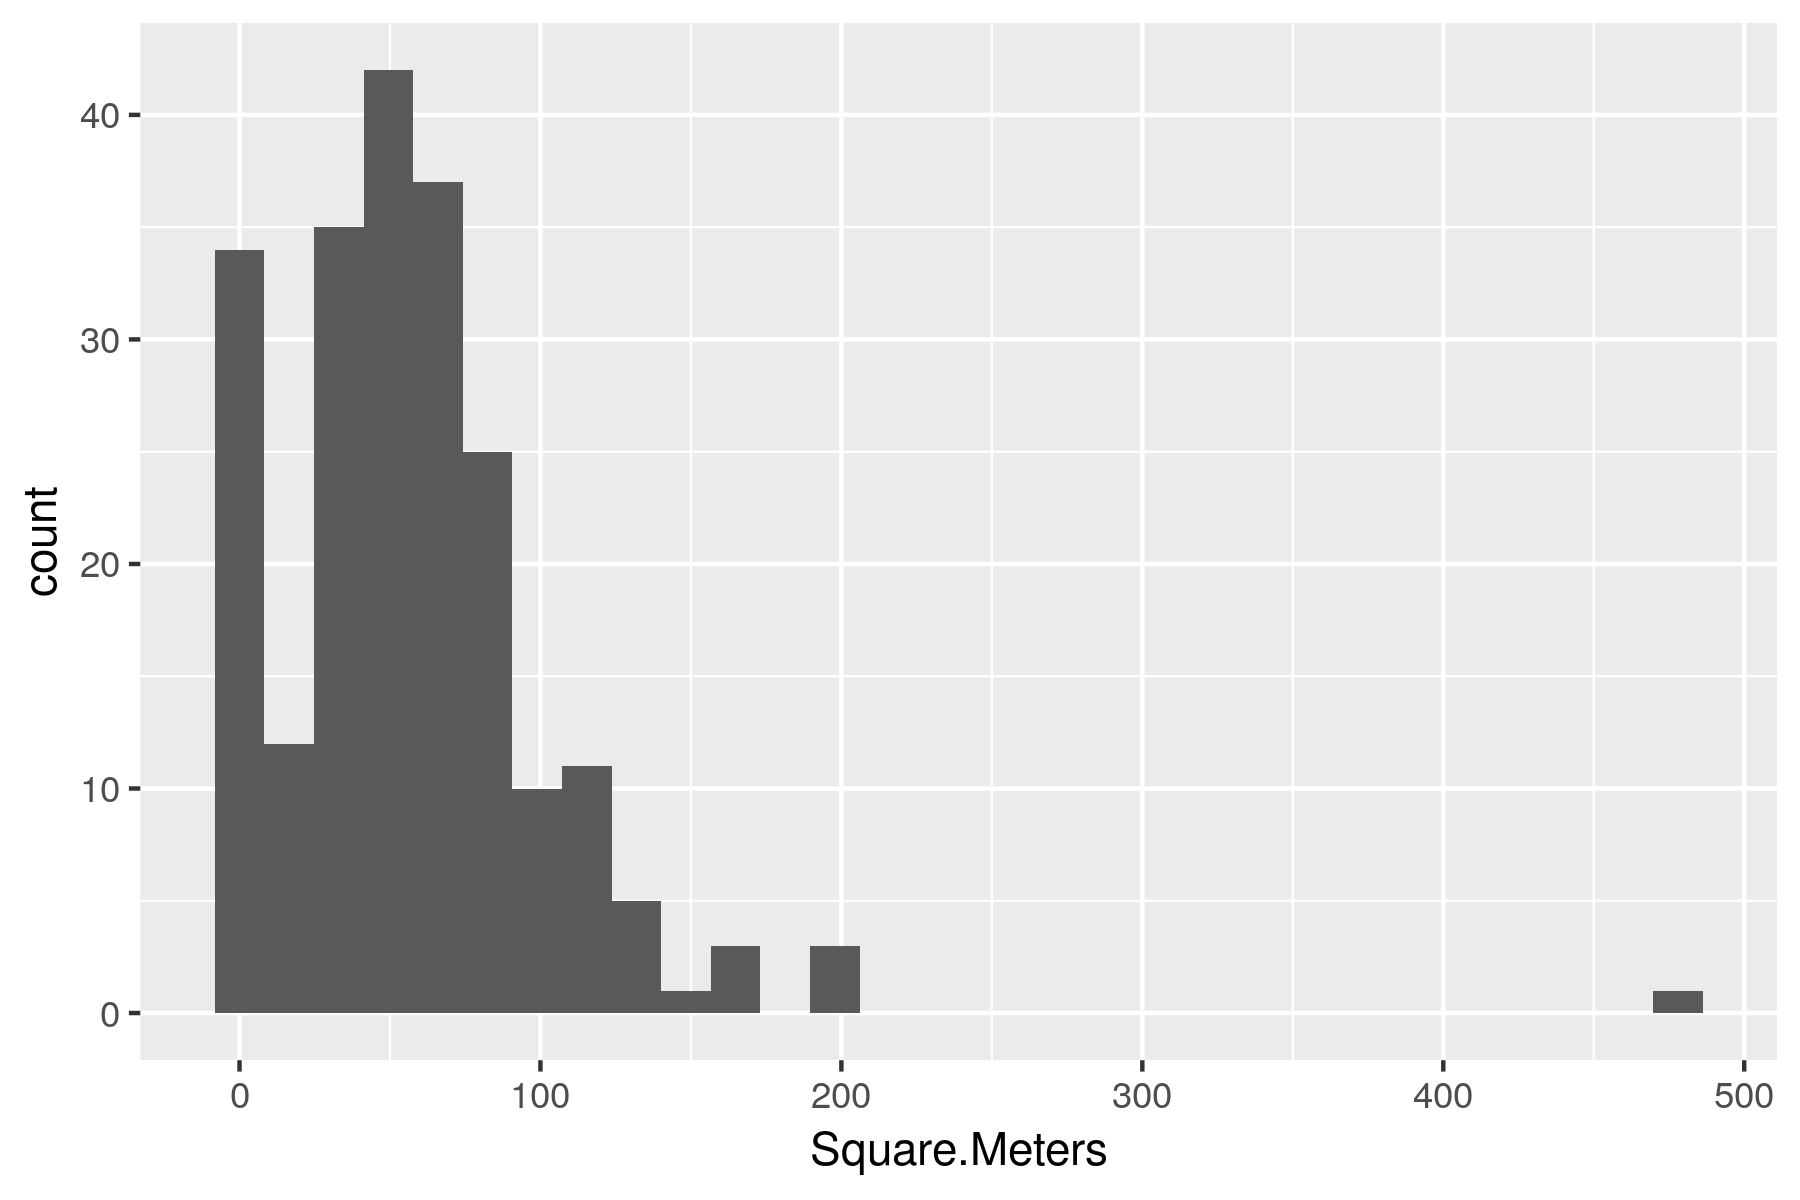

In [12]:
library(ggplot2)
library(GGally)
#histograma de los metros cuadrados
ggplot(df_madrid, aes(x=Square.Meters))+geom_histogram()

#Asignar NA a los apartamentos con menos de 20 m^2
df_madrid <- mutate(df_madrid, Square.Meters = ifelse(Square.Meters <= 20, NA, Square.Meters))

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [13]:
#obtenemos las filas que no son NA
df_madrid_not_na <- df_madrid %>% filter(!is.na(Square.Meters))
#obtenemos los barrios en los que al menos tienen un piso con m^2
not_na <- df_madrid_not_na %>% distinct(Neighbourhood)

#Nos quedamos con los barrios que al menos tienen un piso con m^2
df_madrid <- df_madrid %>% filter(Neighbourhood %in% not_na$Neighbourhood)

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

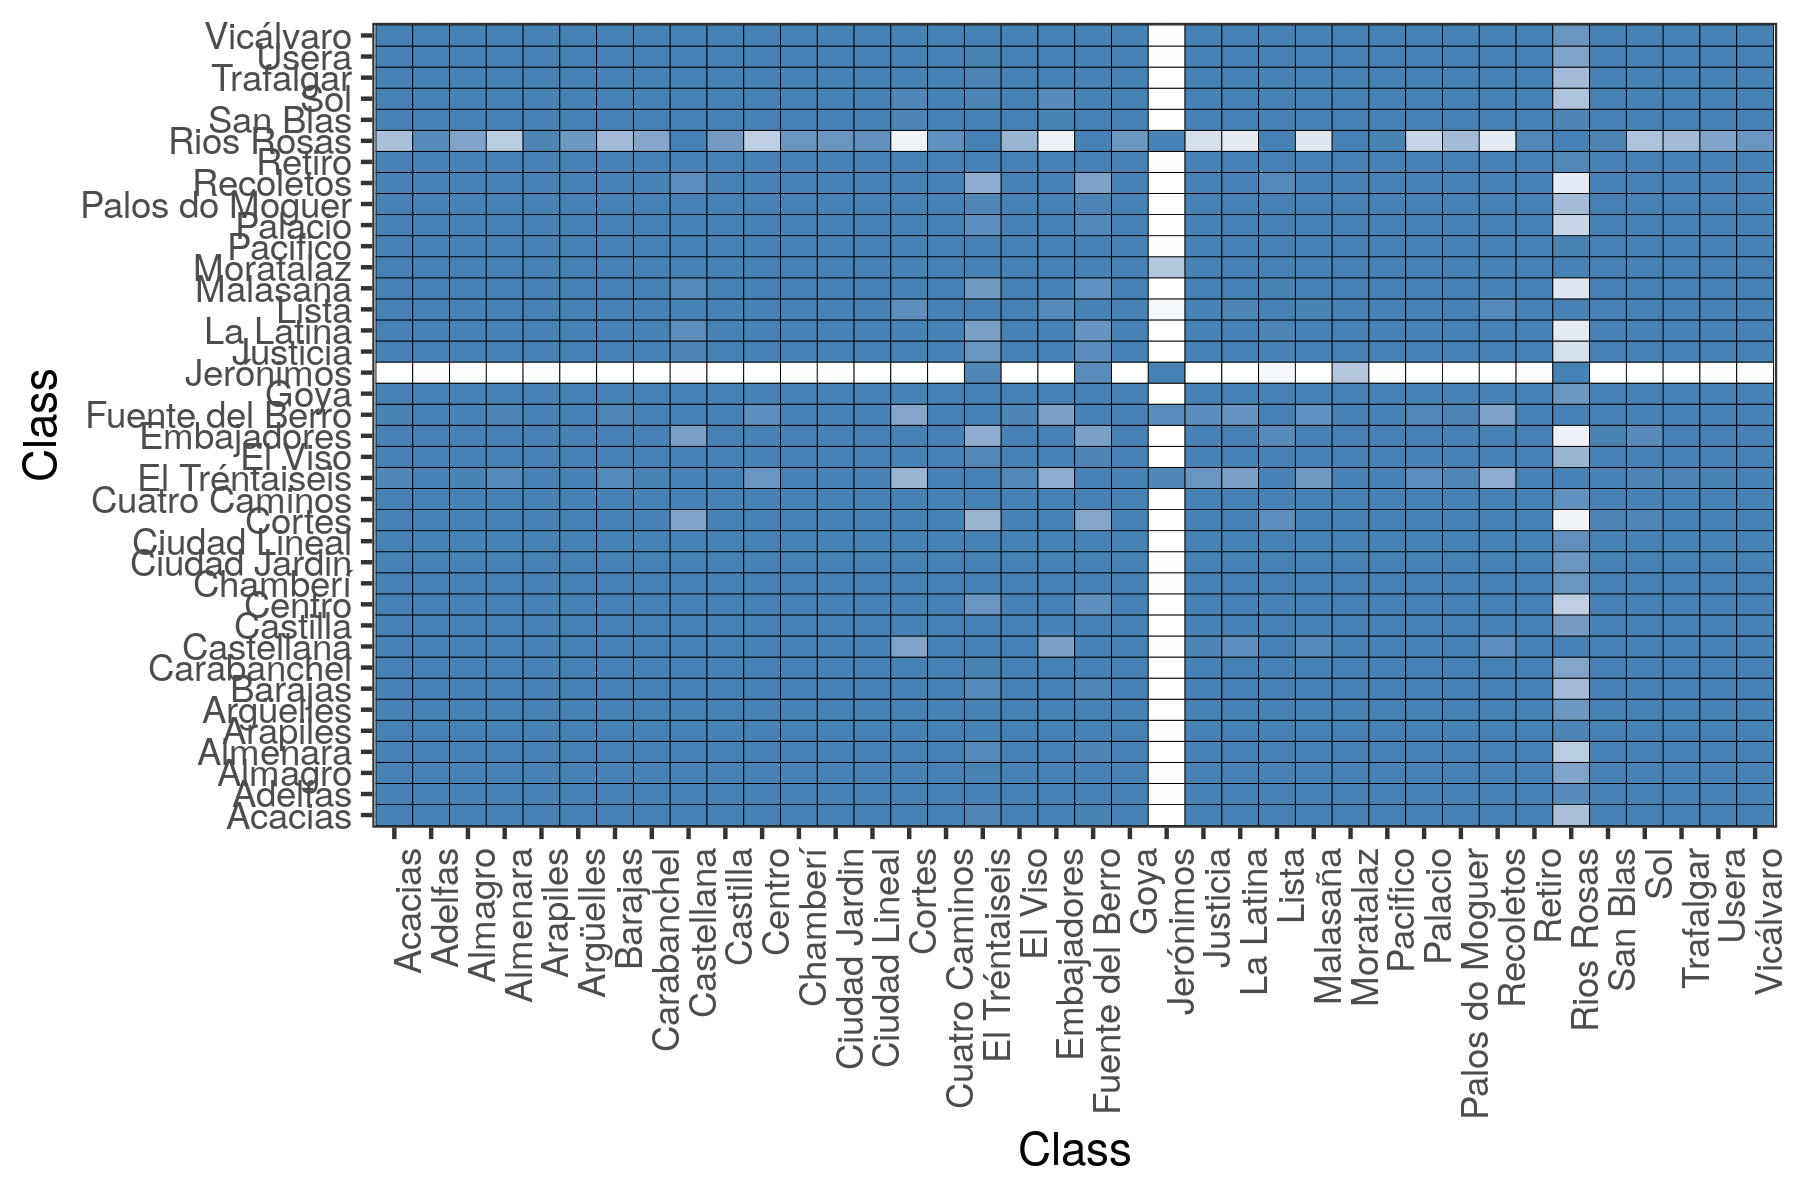

In [14]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [15]:
df_madrid_pru <- df_madrid

df_madrid.dist <- as.dist(1 - resm)
str(df_madrid.dist)
df_madrid.tree <- hclust(df_madrid.dist, method="complete")
df_madrid.dend <- as.dendrogram(df_madrid.tree) 

 'dist' num [1:703] 0 0 0 0 0 ...
 - attr(*, "Labels")= chr [1:38] "Acacias" "Adelfas" "Almagro" "Almenara" ...
 - attr(*, "Size")= int 38
 - attr(*, "call")= language as.dist.default(m = 1 - resm)
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE



---------------------
Welcome to dendextend version 1.15.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




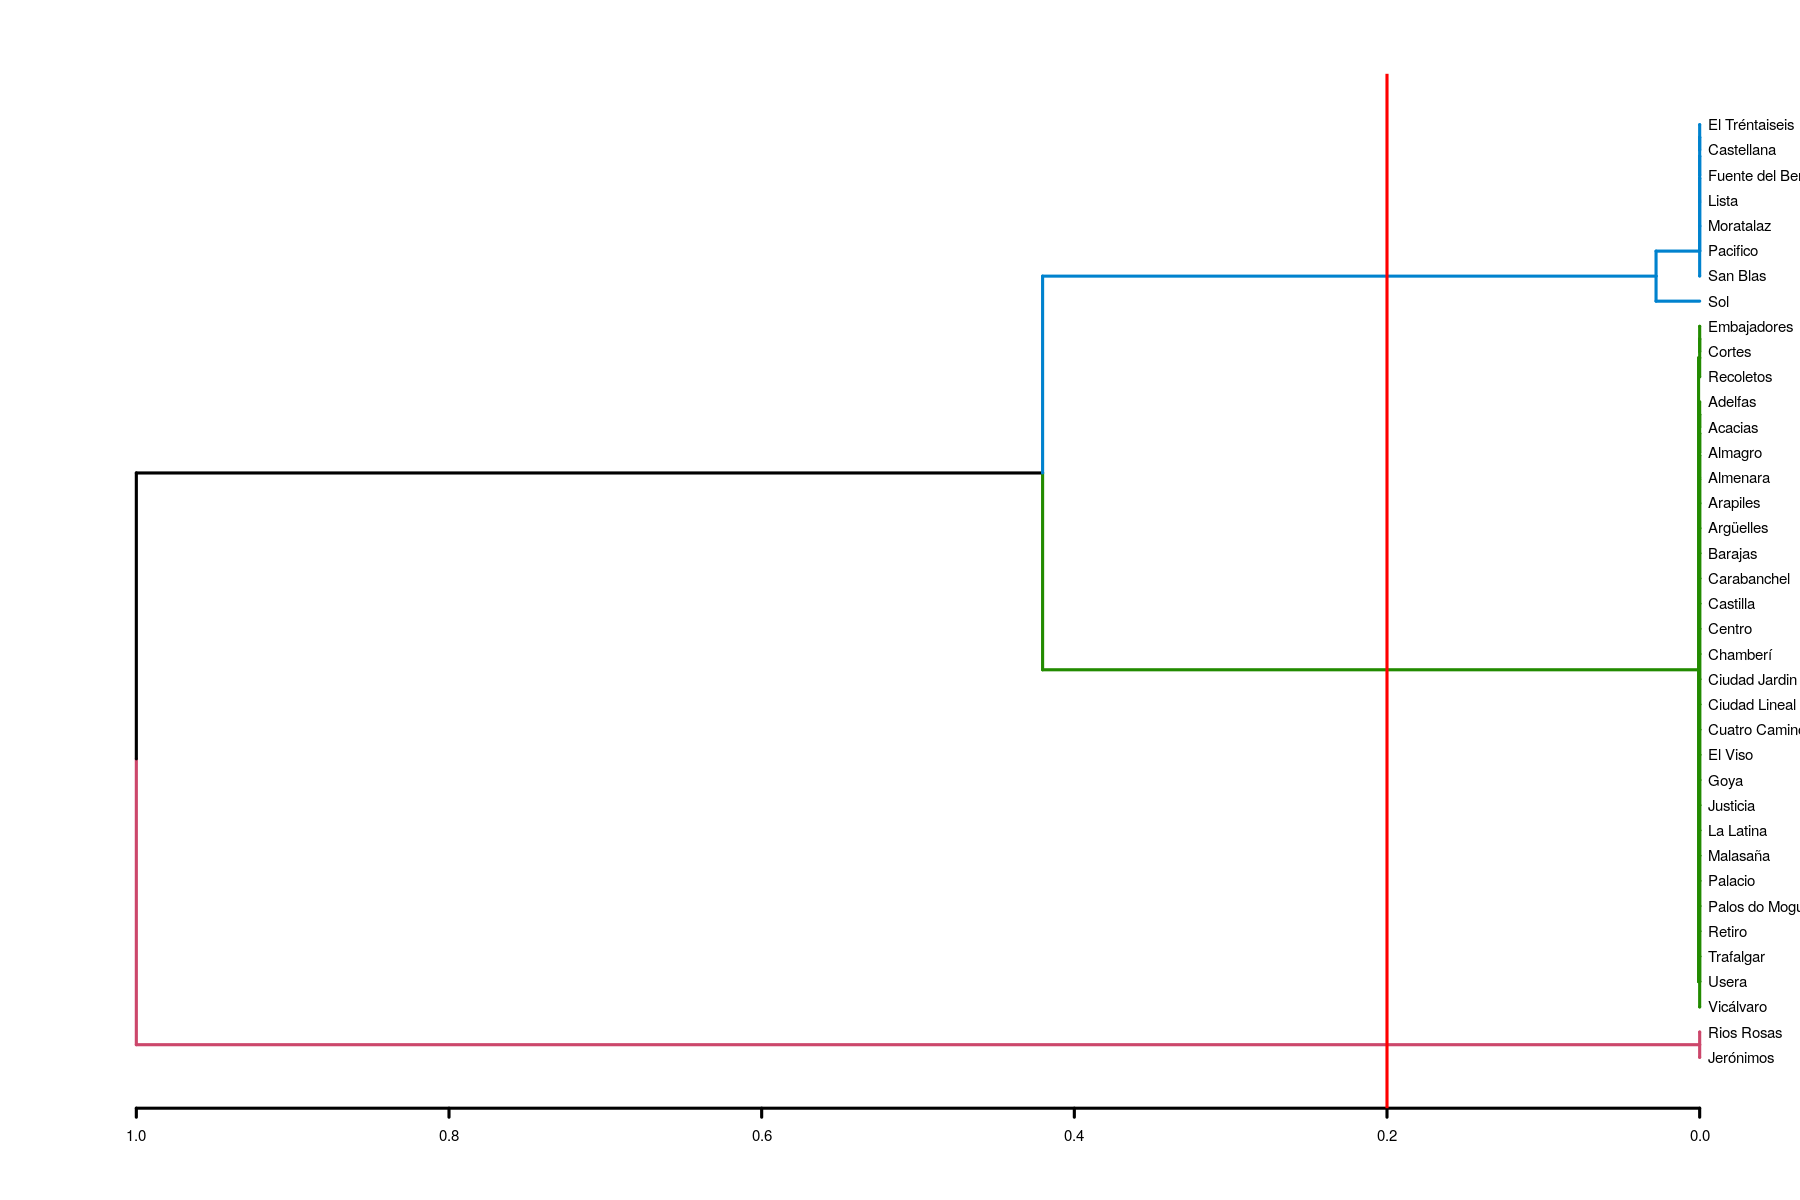

In [16]:
library(dendextend)

par(cex=0.3)
plot(color_branches(df_madrid.dend,h=0.2),horiz=TRUE,cex=0)
abline(v=0.2,col="red")

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

In [17]:
print("El punto de corte aconsejable, para mi es 0.2")
print("El número de cluster que aparecen son 3")

[1] "El punto de corte aconsejable, para mi es 0.2"
[1] "El número de cluster que aparecen son 3"


Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [18]:
library(cluster)
clusters <- cutree(df_madrid.dend, k=3)

In [19]:
#Creamos la nueva columna dentro del data frame
df_madrid <- df_madrid %>% mutate(neighb_id=NA, .before=Neighbourhood)

#Inicializamos el valor de la columna si está dentro del cluster
df_madrid[which(df_madrid$Neighbourhood %in% c(names(clusters[clusters==1]))),'neighb_id'] <- 1
df_madrid[which(df_madrid$Neighbourhood %in% c(names(clusters[clusters==2]))),'neighb_id'] <- 2
df_madrid[which(df_madrid$Neighbourhood %in% c(names(clusters[clusters==3]))),'neighb_id'] <- 3
df_madrid$neighb_id <- as.factor(df_madrid$neighb_id)

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [20]:
#eliminamos los NA para trabajar con el modelo
df_madrid_clean <- df_madrid %>% filter(!is.na(Square.Meters))
df_madrid_clean <- df_madrid_clean %>% filter(!is.na(Bedrooms))

set.seed(12)
idx <- sample(1:nrow(df_madrid_clean),nrow(df_madrid_clean)*0.7)
train.df <- df_madrid_clean[idx,]
test.df <- df_madrid_clean[-idx,]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



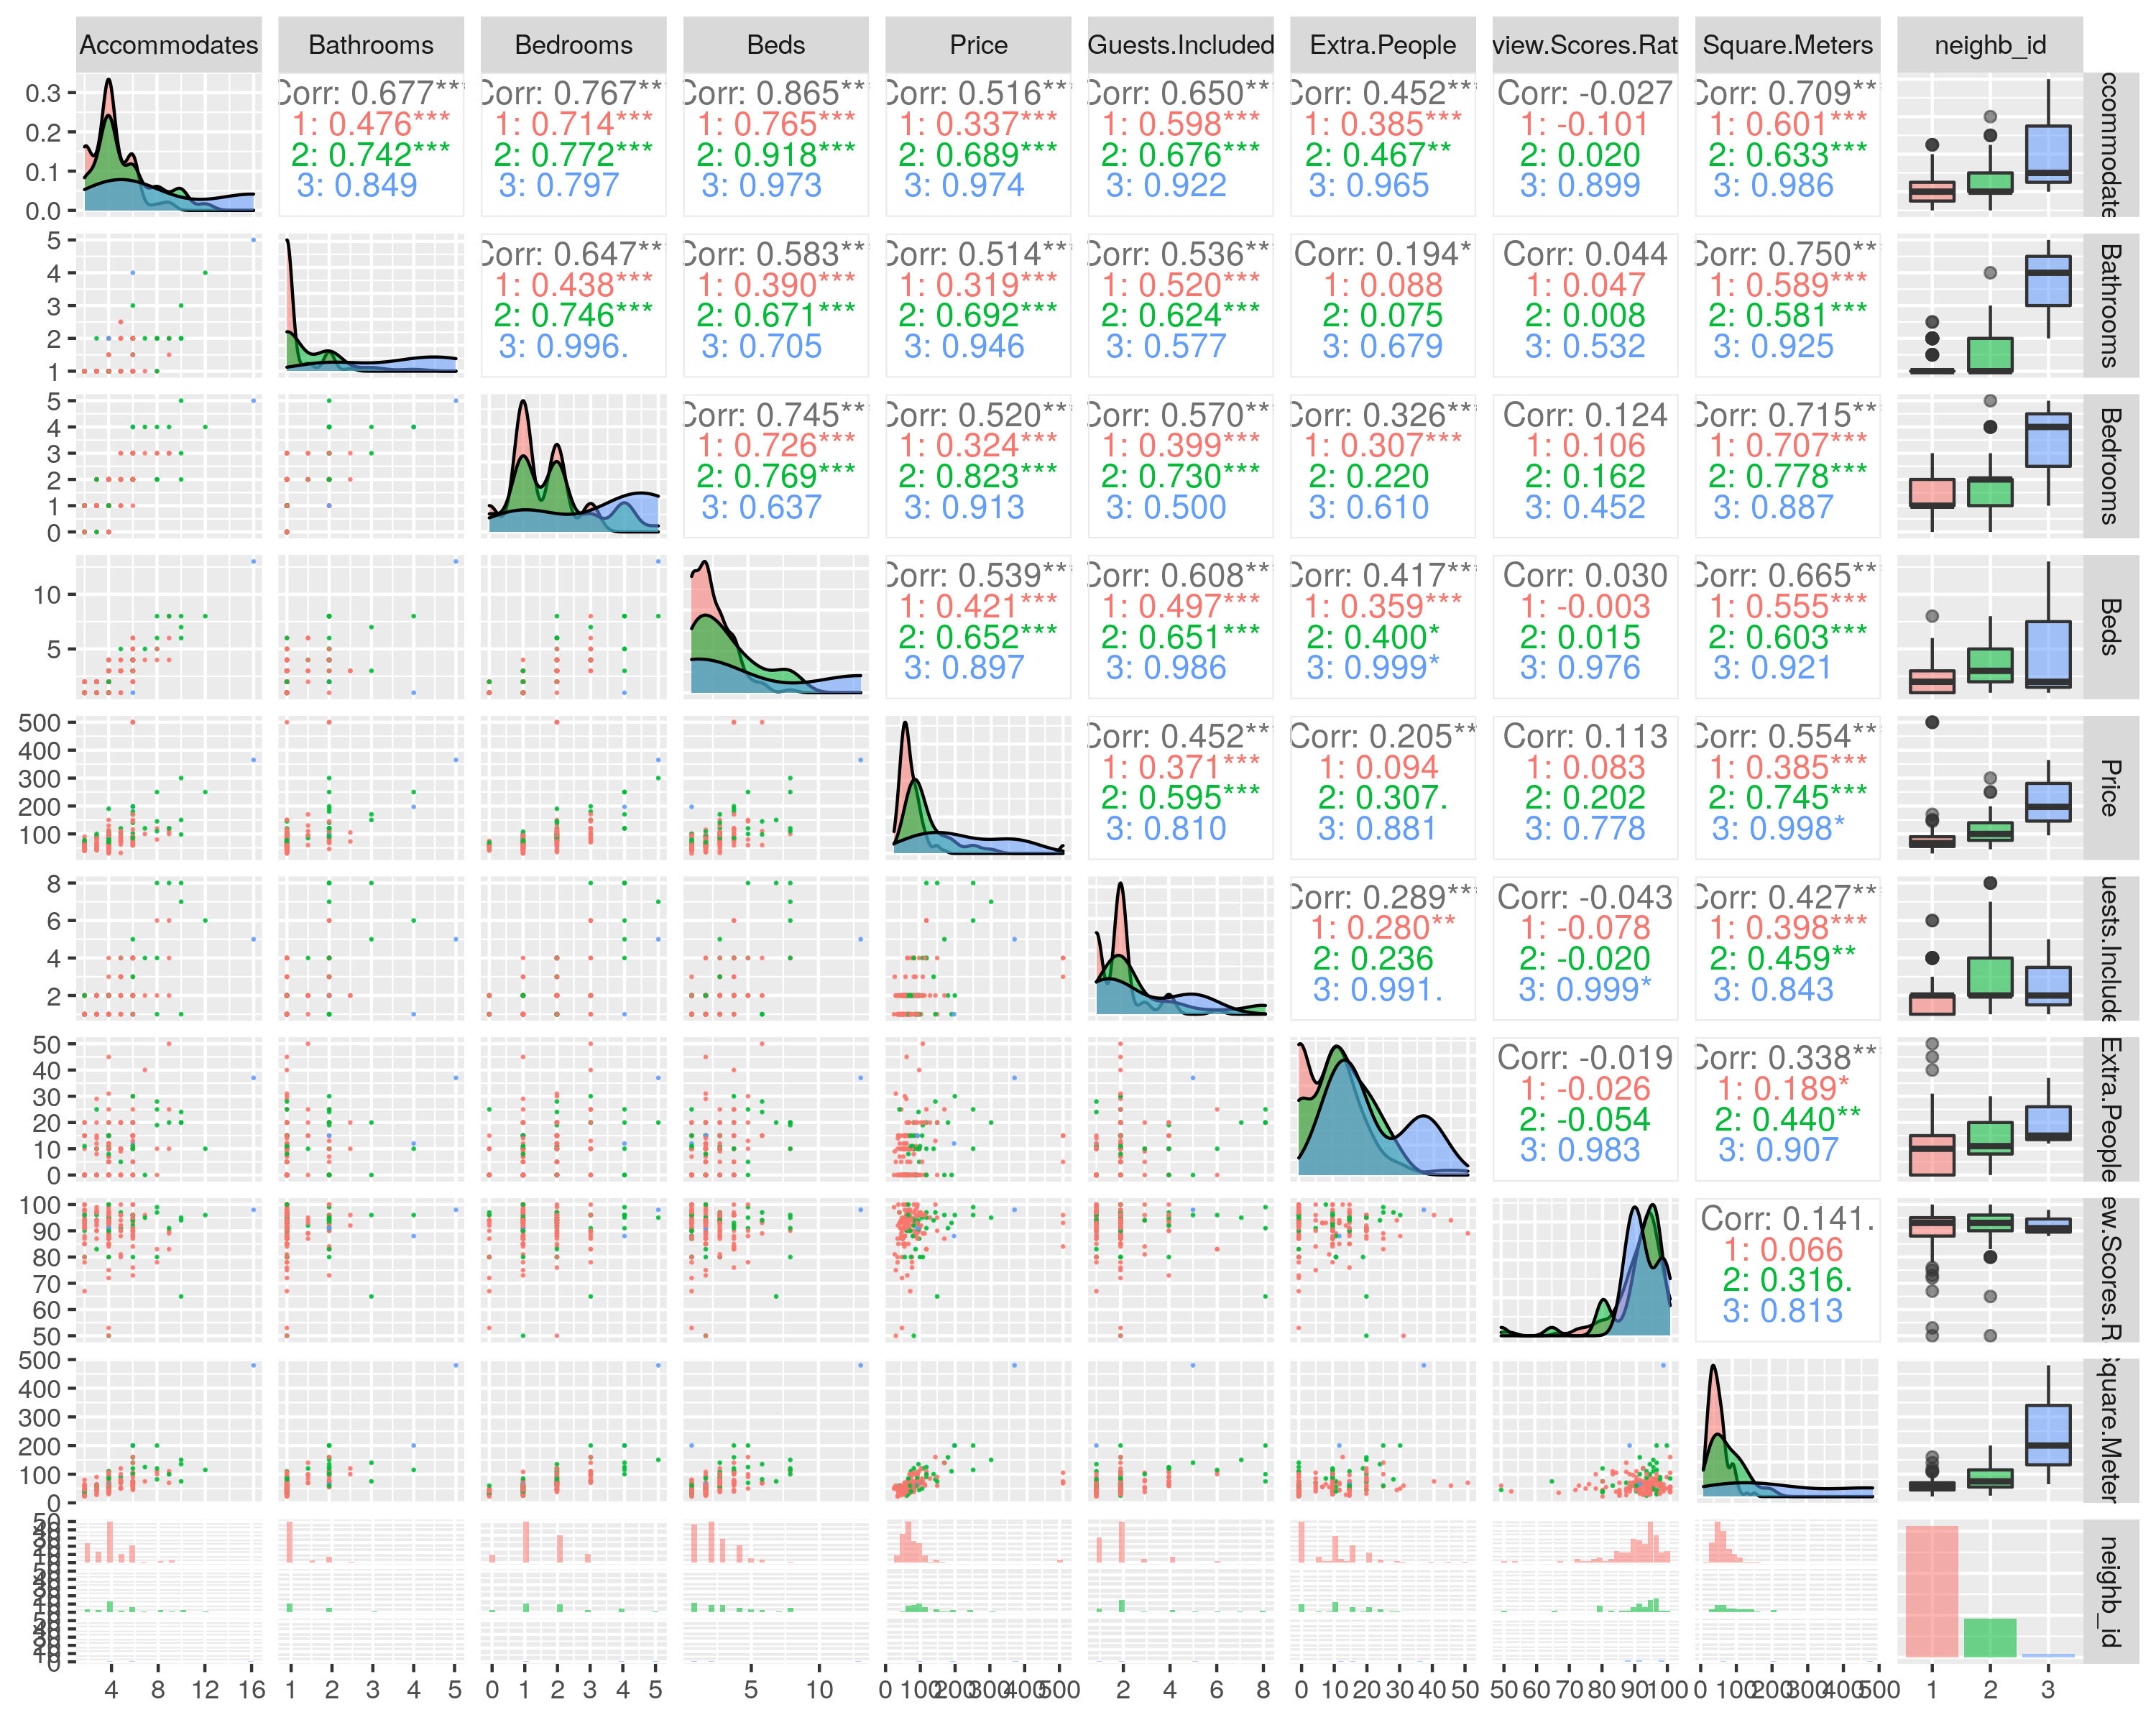

In [21]:
library(GGally)
options(repr.plot.height=8,repr.plot.width=10)
#le quitamos los na para evitar que salga tanto warning
ggpairs(na.omit(df_madrid_clean[,c("Accommodates", "Bathrooms", "Bedrooms", "Beds", "Price", "Guests.Included", "Extra.People", "Review.Scores.Rating", "Square.Meters", "neighb_id")]),
            aes(colour=neighb_id,alpha=0.5),
            lower = list(continuous = wrap("points", alpha = 0.8,size=0.1))
)


In [23]:
#generamos el modelo y vemos sus caracteristicas
model <- lm(data=train.df, formula=Square.Meters~Bedrooms+Accommodates+Price:neighb_id) 
summary(model)
model$coefficients


Call:
lm(formula = Square.Meters ~ Bedrooms + Accommodates + Price:neighb_id, 
    data = train.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.166 -13.986  -2.055   8.652  83.759 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      20.57200    4.74449   4.336 3.15e-05 ***
Bedrooms         17.52799    3.09077   5.671 1.09e-07 ***
Accommodates      2.54208    1.43997   1.765   0.0802 .  
Price:neighb_id1  0.04881    0.03200   1.526   0.1299    
Price:neighb_id2  0.13996    0.03435   4.075 8.55e-05 ***
Price:neighb_id3  0.90725    0.06861  13.224  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.83 on 114 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8424,	Adjusted R-squared:  0.8354 
F-statistic: 121.8 on 5 and 114 DF,  p-value: < 2.2e-16


(Intercept)         Bedrooms     Accommodates Price:neighb_id1 
     20.57199986      17.52799458       2.54207635       0.04881297 
Price:neighb_id2 Price:neighb_id3 
      0.13996267       0.90724550

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

In [24]:
#trabajamos con el modelo en el conjunto de datos de test para comparar
model_test <- lm(data=test.df, formula=Square.Meters~Bedrooms+Accommodates+Price:neighb_id) 
summary(model_test)

test.df$pred_Square_Meters <- predict(model_test, test.df)
caret::postResample(pred=test.df$pred_Square_Meters, obs = test.df$Square.Meters)

test.df$residual <- test.df$Square.Meters - test.df$pred_Square_Meters
test.df$residual <- model_test$residuals



Call:
lm(formula = Square.Meters ~ Bedrooms + Accommodates + Price:neighb_id, 
    data = test.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.674 -10.565  -2.574  10.154  53.254 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      35.00765    6.96627   5.025 8.07e-06 ***
Bedrooms         19.26298    4.11219   4.684 2.51e-05 ***
Accommodates     -0.78073    2.04272  -0.382    0.704    
Price:neighb_id1  0.03836    0.04177   0.918    0.363    
Price:neighb_id2  0.12227    0.06617   1.848    0.071 .  
Price:neighb_id3  0.40912    0.09408   4.348 7.53e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.6 on 46 degrees of freedom
Multiple R-squared:  0.7074,	Adjusted R-squared:  0.6756 
F-statistic: 22.24 on 5 and 46 DF,  p-value: 2.905e-11


RMSE   Rsquared        MAE 
16.5577020  0.7074054 12.9234453

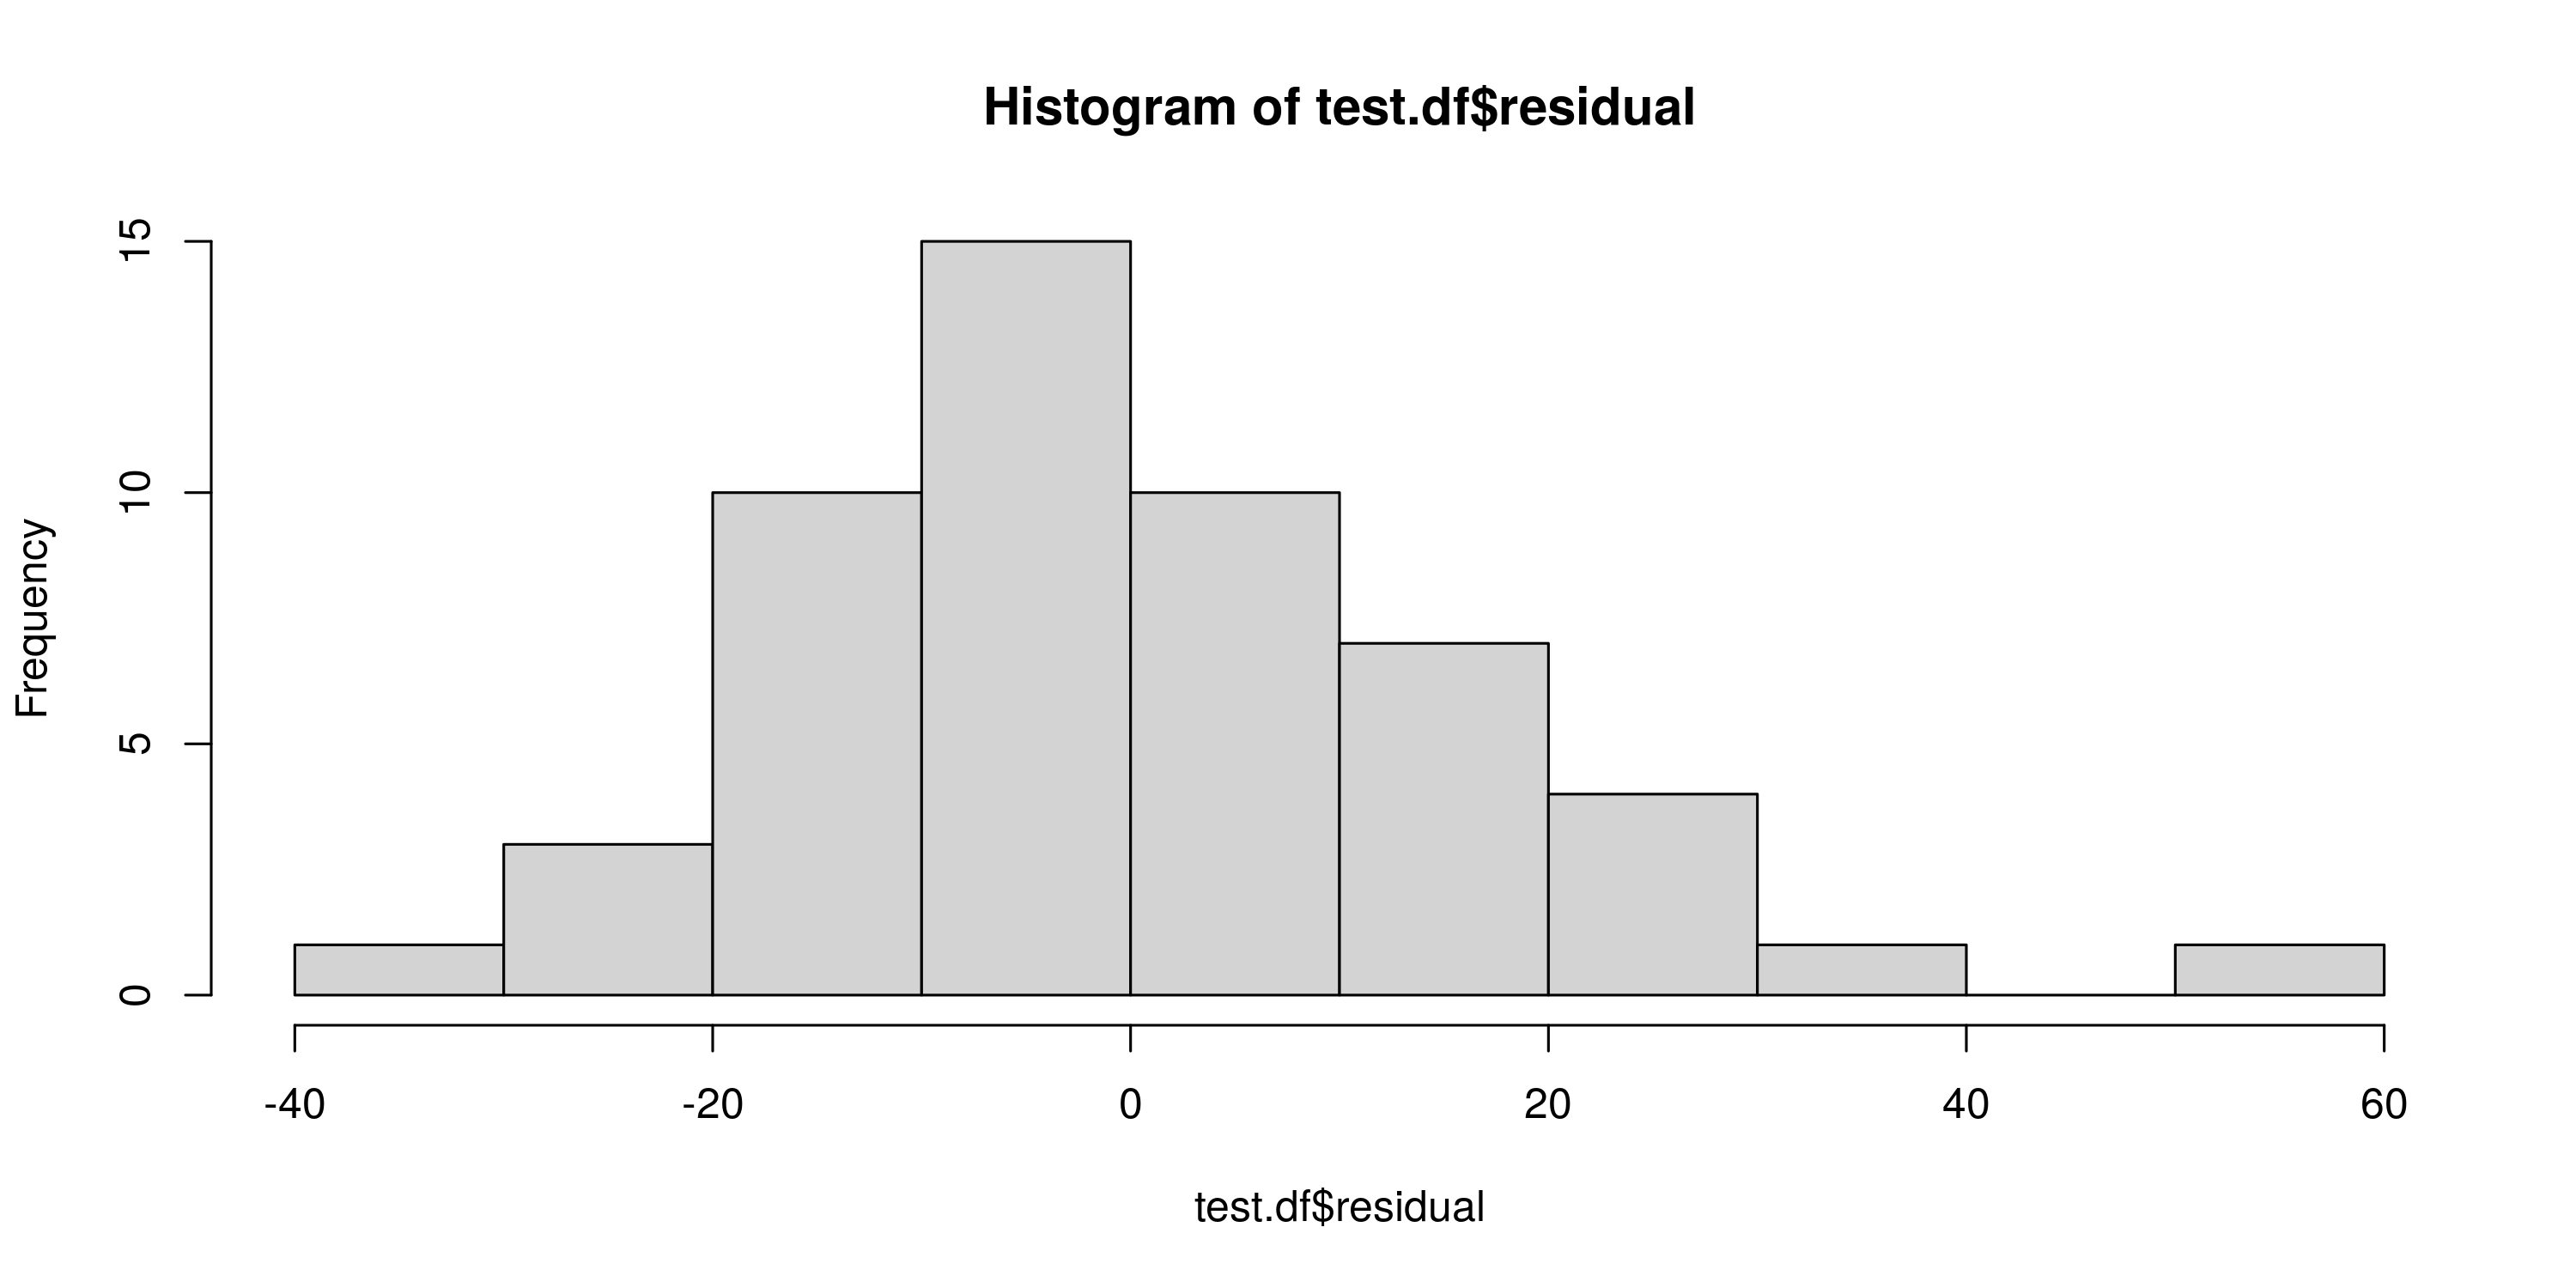

In [25]:
#histograma de los residuos
options(repr.plot.height=5,repr.plot.width=10)
hist(test.df$residual)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [26]:
habitaciones <- 3
personas <- 6
precio <- 80
barrio <- as.factor((df_madrid %>% filter(Neighbourhood=='Sol') %>%filter(row_number()==1))$neighb_id)
camas <- 3
review <- 80
df_calculate <- data.frame(Bedrooms=habitaciones, Accommodates=personas, Price=precio, neighb_id=barrio, Beds=camas, Review.Scores.Rating=review)
square_meters <- predict(model, df_calculate)
paste("El tamaño del apartamento sera de ",round(square_meters),'m^2')

[1] "El tamaño del apartamento sera de  100 m^2"

In [27]:
#me hubiera gustado hacer esto con un for
#pero no se porque extraña razon no me funcionaba el paste y no he sido capaz
#teniendo que hacerlo así que no me gusta nada y no es eficiente

df_calculate_new <- df_calculate

bedrooms_4 <- 4
df_calculate_new$Bedrooms <- bedrooms_4
size_bedrooms_4 <- round(predict(model, df_calculate_new), 2)
paste("Para ", df_calculate_new$Bedrooms ," habitaciones el tamaño del apartamento será de ", size_bedrooms_4,'m^2')

bedrooms_5 <- 5
df_calculate_new$Bedrooms <- bedrooms_5
size_bedrooms_5 <- round(predict(model, df_calculate_new), 2)
paste("Para ", df_calculate_new$Bedrooms ," habitaciones el tamaño del apartamento será de ", size_bedrooms_5,'m^2')

bedrooms_6 <- 6
df_calculate_new$Bedrooms <- bedrooms_6
size_bedrooms_6 <- round(predict(model, df_calculate_new), 2)
paste("Para ", df_calculate_new$Bedrooms ," habitaciones el tamaño del apartamento será de ", size_bedrooms_6,'m^2')

bedrooms_7 <- 7
df_calculate_new$Bedrooms <- bedrooms_7
size_bedrooms_7 <- round(predict(model, df_calculate_new), 2)
paste("Para ", df_calculate_new$Bedrooms ," habitaciones el tamaño del apartamento será de ", size_bedrooms_7,'m^2')

bedrooms_8 <- 8
df_calculate_new$Bedrooms <- bedrooms_8
size_bedrooms_8 <- round(predict(model, df_calculate_new), 2)
paste("Para ", df_calculate_new$Bedrooms ," habitaciones el tamaño del apartamento será de ", size_bedrooms_8,'m^2')

paste("Las diferencias entre apartamentos son:")
paste(" - Entre ", bedrooms_4, " y ", bedrooms_5, " habitaciones: ", size_bedrooms_5-size_bedrooms_4, "m^2")
paste(" - Entre ", bedrooms_5, " y ", bedrooms_6, " habitaciones: ", size_bedrooms_6-size_bedrooms_5, "m^2")
paste(" - Entre ", bedrooms_6, " y ", bedrooms_7, " habitaciones: ", size_bedrooms_7-size_bedrooms_6, "m^2")
paste(" - Entre ", bedrooms_7, " y ", bedrooms_8, " habitaciones: ", size_bedrooms_8-size_bedrooms_7, "m^2")

paste("El aumento por habitación es de ", size_bedrooms_5-size_bedrooms_4, "m^2 confirmando el valor que nos muestra la función summary del modelo")

[1] "Para  4  habitaciones el tamaño del apartamento será de  117.13 m^2"

[1] "Para  5  habitaciones el tamaño del apartamento será de  134.66 m^2"

[1] "Para  6  habitaciones el tamaño del apartamento será de  152.19 m^2"

[1] "Para  7  habitaciones el tamaño del apartamento será de  169.72 m^2"

[1] "Para  8  habitaciones el tamaño del apartamento será de  187.25 m^2"

[1] "Las diferencias entre apartamentos son:"

[1] " - Entre  4  y  5  habitaciones:  17.53 m^2"

[1] " - Entre  5  y  6  habitaciones:  17.53 m^2"

[1] " - Entre  6  y  7  habitaciones:  17.53 m^2"

[1] " - Entre  7  y  8  habitaciones:  17.53 m^2"

[1] "El aumento por habitación es de  17.53 m^2 confirmando el valor que nos muestra la función summary del modelo"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [28]:
#me gustaría haber utilizado la libreria dplyr pero no he sido capaz 
df_madrid[is.na(df_madrid$Square.Meters), ]$Square.Meters <- predict(model, df_madrid[is.na(df_madrid$Square.Meters), ])

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [29]:
#nos preparamos el data frame
df_madrid_pca <- df_madrid %>% select(Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters)
df_madrid_pca <- na.omit(df_madrid_pca)

#apartamento que utilizaremos en el ejercicio
new_apt <- data.frame(Accommodates=02,
                      Bathrooms=1,
                      Bedrooms=2,
                      Beds=3,
                      Price=100,
                      Guests.Included=03,
                      Extra.People=10,
                      Review.Scores.Rating=76,
                      Latitude=40.40129,
                      Longitude=-3.701592,
                      Square.Meters=20)

#generamos los df para el modelo
set.seed(3)
idx <- sample(1:nrow(df_madrid_pca),nrow(df_madrid_pca)*0.7)
train_madrid <- df_madrid_pca[idx,]
test_madird <- df_madrid_pca[-idx,]

In [30]:
#aplicamos pca al df de entrenamiento
pc_apts<-prcomp(train_madrid,center = TRUE, scale. = TRUE)
str(pc_apts)

#pc_apts$sdev
#pc_apts$rotation

List of 5
 $ sdev    : num [1:11] 2.179 1.179 1.03 1.008 0.827 ...
 $ rotation: num [1:11, 1:11] 0.411 0.351 0.404 0.392 0.338 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:11] "Accommodates" "Bathrooms" "Bedrooms" "Beds" ...
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:11] 4.09 1.23 1.4 2.35 86.4 ...
  ..- attr(*, "names")= chr [1:11] "Accommodates" "Bathrooms" "Bedrooms" "Beds" ...
 $ scale   : Named num [1:11] 1.862 0.493 0.921 1.484 54.172 ...
  ..- attr(*, "names")= chr [1:11] "Accommodates" "Bathrooms" "Bedrooms" "Beds" ...
 $ x       : num [1:2930, 1:11] -1.23 -2.5 3.2 -1.09 4.39 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2930] "3305" "4424" "755" "3427" ...
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


[1] 2.1794021 1.1790568 1.0301066 1.0079939 0.8268047 0.7722440 0.7114180
 [8] 0.6004601 0.5730975 0.4051413 0.3790060

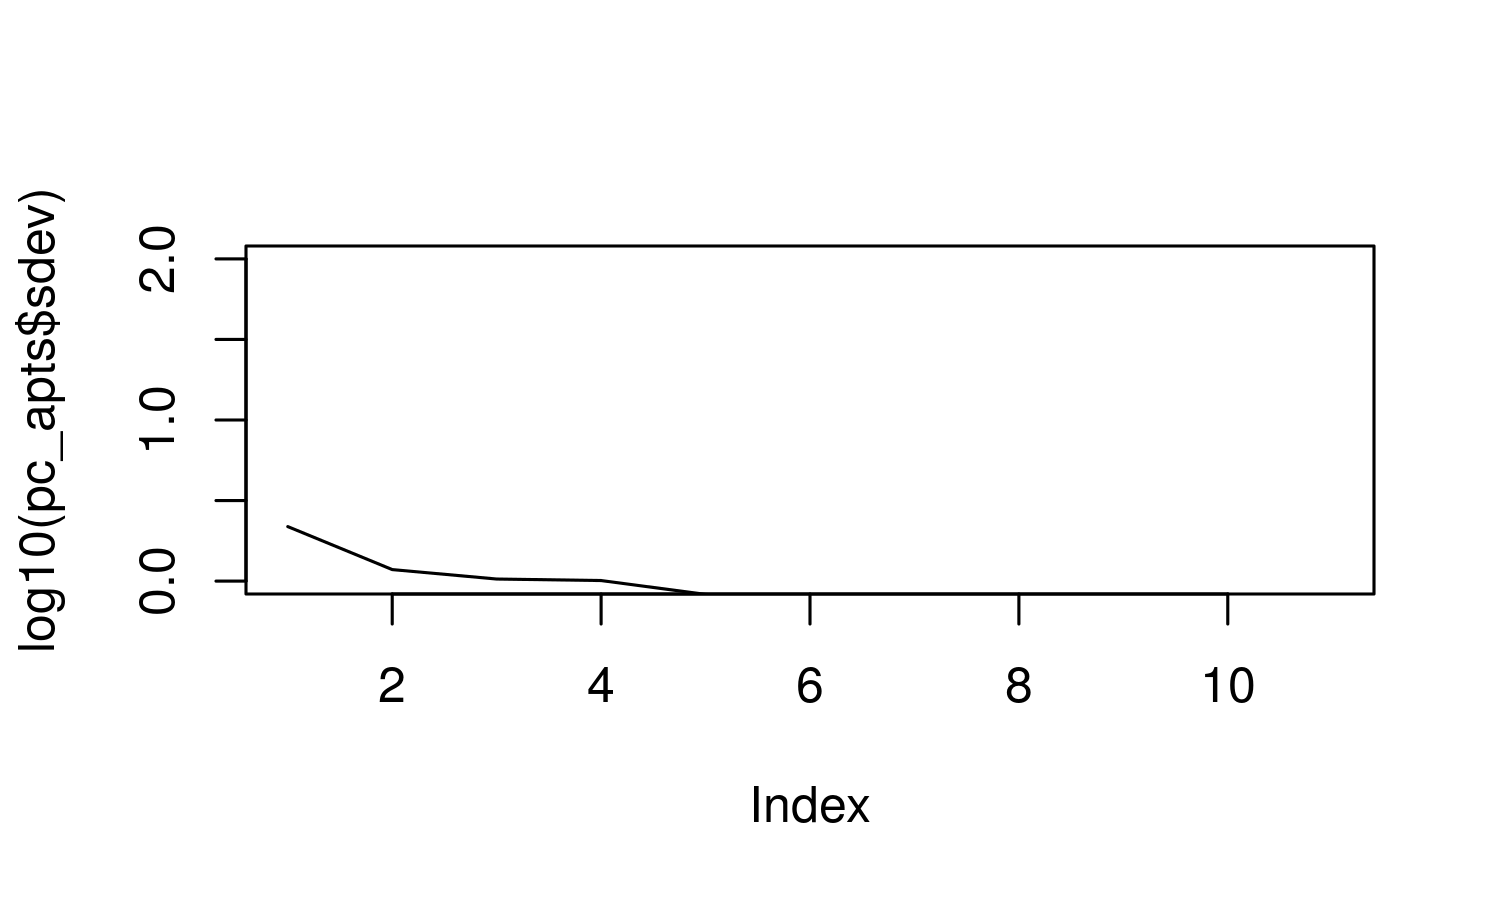

In [31]:
#buscamos los componentes principales con los que nos vamos a quedar
options(repr.plot.height=3,repr.plot.width=5)
plot(log10(pc_apts$sdev),t='l',ylim = c(0,2))
pc_apts$sdev

#voy a quedarme con los tres primeros aunque podríamos quedarnos tanto con 2 como con 4
number_of_pca_components <- 3

In [32]:
#obtenemos la transformada del nuevo apartamento
t_new_apt <- predict(pc_apts, new_apt)

#nos quedamos con los componentes principales
t_new_apt <- t_new_apt[,1:number_of_pca_components]
pc_apts <- pc_apts$x[,1:number_of_pca_components]

In [33]:
get_similary <- function(t_new_apt, pc_apts) {
    #comparación entre los que tenemos y el nuevo apartamento
    dist <- rep(NA,nrow(pc_apts))
    for (i in 1:nrow(pc_apts)){
        dist[i]<-sum((t_new_apt-pc_apts[i,])^2)
    }
    #nos quedamos con los 5 
    order(dist)[1:5]
}

In [35]:
#hacemos la llamada
similary <- get_similary(t_new_apt, pc_apts)

rownames(df_madrid_pca)=NULL
df_madrid_pca[similary, ]


,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1497,4,1,2,2,50,2,8,96,40.42316,-3.655636,68.23694
71,4,1,2,2,60,2,8,99,40.42338,-3.703493,68.72507
1210,4,1,1,2,70,3,20,94,40.42195,-3.699313,51.68521
1233,2,1,1,1,44,1,0,98,40.41186,-3.701262,45.33192
90,2,1,0,1,37,1,0,85,40.42115,-3.704555,27.46223


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?